In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

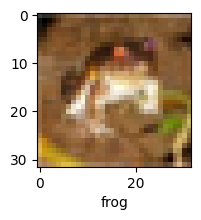

In [10]:
plot_sample(X_train, y_train, 0)

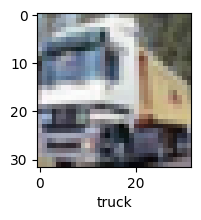

In [11]:
plot_sample(X_train, y_train, 1)

## Normalizing

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 93ms/step - accuracy: 0.2997 - loss: 1.9383
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.4212 - loss: 1.6461
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 209s 99ms/step - accuracy: 0.4557 - loss: 1.5493
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 194s 94ms/step - accuracy: 0.4781 - loss: 1.4872
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 95ms/step - accuracy: 0.4922 - loss: 1.4402


In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.40      0.68      0.51      1000
           1       0.78      0.33      0.47      1000
           2       0.39      0.25      0.30      1000
           3       0.38      0.20      0.26      1000
           4       0.37      0.42      0.39      1000
           5       0.45      0.26      0.33      1000
           6       0.63      0.30      0.41      1000
           7       0.28      0.82      0.42      1000
           8       0.55      0.59      0.57      1000
           9       0.61      0.34      0.44      1000

    accuracy                           0.42     10000
   macro avg       0.48      0.42      0.41     10000
weighted avg       0.48      0.42      0.41     10000



In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 42ms/step - accuracy: 0.3882 - loss: 1.6795
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.6065 - loss: 1.1207
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.6619 - loss: 0.9689
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.6993 - loss: 0.8632
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 42ms/step - accuracy: 0.7234 - loss: 0.7973
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 44ms/step - accuracy: 0.7411 - loss: 0.7469
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.7568 - loss: 0.7036
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 46ms/step - accuracy: 0.7746 - loss: 0.6508
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7882 - loss: 0.6051
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8027 - loss: 0.5650


## With CNN, at the end 5 epochs, accuracy was at around 72% and after 10 epochs it is 80%


In [18]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7059 - loss: 0.9094


[0.9303534030914307, 0.6977999806404114]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


array([[3.4492219e-05, 1.2470067e-05, 3.1647176e-04, 9.6880412e-01,
        3.3050380e-04, 2.2044411e-02, 2.0034879e-03, 7.2053570e-07,
        6.4355261e-03, 1.7824495e-05],
       [7.3981087e-04, 2.7305739e-02, 6.3961210e-08, 5.5958433e-09,
        2.2499243e-10, 1.0507002e-09, 3.2835525e-09, 1.2276050e-07,
        9.7143191e-01, 5.2231108e-04],
       [1.8994208e-01, 2.2482191e-01, 2.4394662e-04, 1.2586677e-03,
        1.0689006e-04, 2.5053986e-04, 2.1099893e-05, 3.1100125e-03,
        5.0933623e-01, 7.0908599e-02],
       [6.0945076e-01, 2.3614684e-01, 6.1580082e-03, 2.8634968e-03,
        2.4832613e-03, 1.3774361e-04, 1.4731081e-03, 1.1163454e-03,
        1.3576834e-01, 4.4020824e-03],
       [3.2205435e-08, 1.6882814e-05, 6.9629587e-04, 1.7788935e-02,
        5.6530960e-02, 8.0205595e-05, 9.2484391e-01, 3.6327975e-08,
        4.2504635e-05, 8.1817966e-08]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

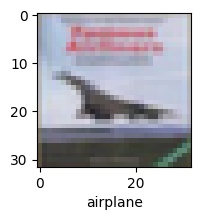

In [22]:
plot_sample(X_test, y_test,3)

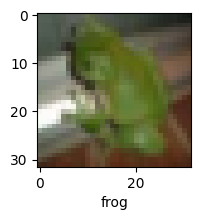

In [23]:
plot_sample(X_test, y_test,7)

In [25]:
classes[y_classes[70]]

'bird'

In [26]:
classes[y_classes[35]]

'cat'